In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7588 - accuracy: 0.3526 - val_loss: 1.1875 - val_accuracy: 0.5768
Epoch 2/20
1250/1250 [==============================] - 17s 14ms/step - loss: 1.2385 - accuracy: 0.5606 - val_loss: 1.0079 - val_accuracy: 0.6519
Epoch 3/20
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0700 - accuracy: 0.6240 - val_loss: 0.9493 - val_accuracy: 0.6659
Epoch 4/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9901 - accuracy: 0.6541 - val_loss: 0.8979 - val_accuracy: 0.6871
Epoch 5/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8986 - accuracy: 0.6848 - val_loss: 0.8664 - val_accuracy: 0.6966
Epoch 6/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8299 - accuracy: 0.7061 - val_loss: 0.8408 - val_accuracy: 0.7102
Epoch 7/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.7898 - accuracy: 0.7239 - val_loss: 0.8877 -

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
predictions = np.argmax(model.predict(test_images), axis=-1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(test_labels, predictions)
print("Classification Report:")
print(class_report)

313/313 [==============================] - 1s 4ms/step - loss: 0.9842 - accuracy: 0.7201
Test accuracy: 0.7200999855995178
Confusion Matrix:
[[765  15  39  30  21   3   5  12  81  29]
 [ 27 853   7   6   4   2  10   2  22  67]
 [ 69   4 581  77  86  65  60  27  17  14]
 [ 23  10  61 558  62 166  60  33  16  11]
 [ 19   3  64  80 677  39  35  65  12   6]
 [ 10   3  45 202  49 625  12  43   7   4]
 [  4   3  50  76  48  15 796   3   3   2]
 [ 16   5  42  48  64  66   5 734   2  18]
 [ 65  30  12  21   7  10   4   4 821  26]
 [ 35  77   9  23   5   5   9  13  33 791]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1000
           1       0.85      0.85      0.85      1000
           2       0.64      0.58      0.61      1000
           3       0.50      0.56      0.53      1000
           4       0.66      0.68      0.67      1000
           5       0.63      0.62      0.63      1000
           6       0.80   

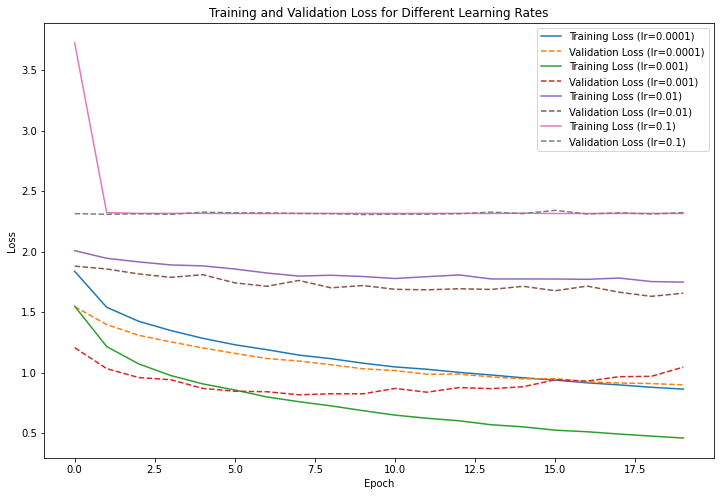

In [6]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.001, 0.01, 0.1]
history_dict = {}

for lr in learning_rates:
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, verbose=0)
    
    history_dict[f'lr_{lr}'] = {
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# Plotting
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    plt.plot(history_dict[f'lr_{lr}']['train_loss'], label=f'Training Loss (lr={lr})')
    plt.plot(history_dict[f'lr_{lr}']['val_loss'], label=f'Validation Loss (lr={lr})', linestyle='--')

plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()